<a href="https://colab.research.google.com/github/OlamideIdowu/Sentiment-Classifier/blob/main/SentimentAnalysis%7CClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#importing necessary libraries
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt

**DATA ANALYSIS AND PROCESSING**

In [5]:
tweets = pd.read_csv("Tweets.csv")
tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


Since the goal of this propject is to build a sentiment classifier, a lot of this columns are not needed and will be removed


In [7]:
tweets = tweets[["text", "airline_sentiment"]]
tweets.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


In [8]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   text               14640 non-null  object
 1   airline_sentiment  14640 non-null  object
dtypes: object(2)
memory usage: 228.9+ KB


No missing values


A function to process the text column will be built. This function will make use of the re and nltk libraries in removing stopwords and lemmatization (transforming words to their true features)

In [21]:
#importing the required libraries
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [22]:
lemmatizer = WordNetLemmatizer()

In [23]:
def processor(text):
  #removing special character with re
  text = re.sub(r'\@\w+|\#','', text)
  text = text = re.sub(r'[^A-Za-z\s]', '', text)
  text = text.lower()
  #tokenizing the text
  words = text.split()
  #removing stopwords and lemmatizing
  words = [lemmatizer.lemmatize(word) for word in words if word not in stopwords.words("english")]
  return ' '.join(words)

In [24]:
#applying the function to the text column
tweets["cleaned_text"] = tweets["text"].apply(processor)

**WORD CLOUD VISUALIZATION**

This visualization will show the most common words with each sentiment group

In [25]:
from wordcloud import WordCloud

In [32]:
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()

Applying the function to the columns


In [33]:
positive_tweets = tweets[tweets['airline_sentiment'] == 'positive']["cleaned_text"]
negative_tweets = tweets[tweets['airline_sentiment'] == 'negative']["cleaned_text"]

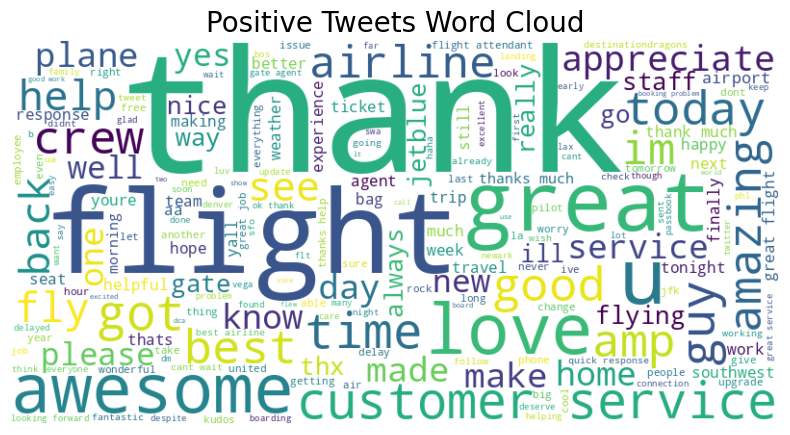

In [34]:
generate_wordcloud(positive_tweets, 'Positive Tweets Word Cloud')

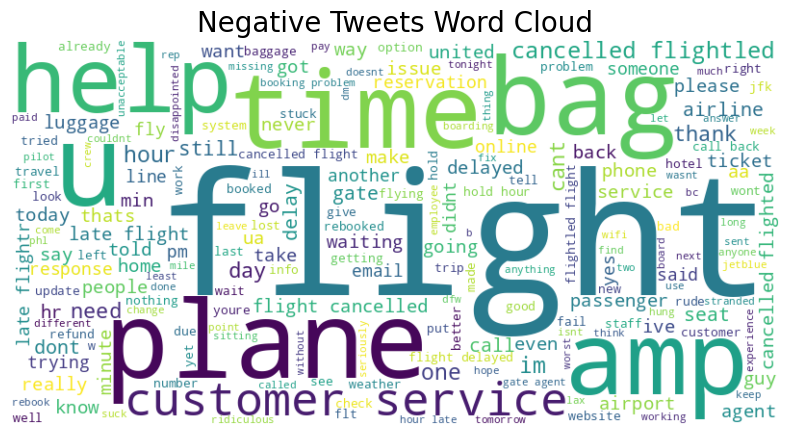

In [35]:
generate_wordcloud(negative_tweets, 'Negative Tweets Word Cloud')

**FEATURE EXTRACTION AND MODELLING**

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [37]:
vectorizer = TfidfVectorizer(max_features = 2500)

In [39]:
X = vectorizer.fit_transform(tweets["cleaned_text"])
y = tweets["airline_sentiment"].apply(lambda x: 1 if x == "positive" else 0)
#the lambda function is used to convert the sentiment column into integers and ML models do not work with strings

**BUILDING NAIVE BAYES CLASSIFIER**

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 92, stratify = y)

In [44]:
model = MultinomialNB()

In [45]:
model.fit(X_train, y_train)

MultinomialNB()

In [46]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [47]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [48]:
print(train_accuracy)

0.8940281030444965


In [49]:
print(test_accuracy)

0.8822859744990893


**Extracting Model and Vectorizer and giving it new input to make predictions on**

In [50]:
import pickle

In [52]:
with open('naive_bayes_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [53]:
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

In [54]:
with open('naive_bayes_model.pkl', 'rb') as f:
    nb_model = pickle.load(f)

with open('tfidf_vectorizer.pkl', 'rb') as f:
    vectorizer = pickle.load(f)

In [58]:
stop_words = set(stopwords.words('english'))
def process_input(text):
    text = re.sub(r'\@\w+|\#','', text)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = text.lower()
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

In [66]:
def predict_sentiment(input_text):
    processed_text = process_input(input_text)
    text_features = vectorizer.transform([processed_text]).toarray()
    prediction = nb_model.predict(text_features)
    if prediction[0] == 1:
       return "positive"
    else:
       return "negative"

**REAL LIFE SCENARIO**

In [68]:
input_text = "I loved this flight, thanks to the airline"
result = predict_sentiment(input_text)
print(f"The sentiment of the input text is: {result}")

The sentiment of the input text is: positive


In [69]:
input_text = "My flight was delayed twice, before it was cancelled"
result = predict_sentiment(input_text)
print(f"The sentiment of the input text is: {result}")

The sentiment of the input text is: negative
